In [1]:
import tigertail as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we create 2 datasets and use them to demonstrate the use of the classes in the TigerTail library. The first dataset contains the timestamps at which Cassie receives a birthday gift on her birthday, along with a rating from 0-1 of how much she liked the gift. The second dataset contains Cassie's heart rate per minute of her birthday. All of this data is contained within the time range of 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

Here we generate a dataframe with the timestamps at which Cassie receives a gift during her birthday and her rating of each gift. We choose the gift timestamps at random from a date_range of timestamps from 11/18/1999 00:00:00 to 11/19/1999 00:00:00.

In [2]:
timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-19 00:00:00', freq='1min')

gift_timestamp = np.random.choice(timestamp, size=100)
gift_timestamp

array(['1999-11-18T05:36:00.000000000', '1999-11-18T19:32:00.000000000',
       '1999-11-18T01:27:00.000000000', '1999-11-18T16:45:00.000000000',
       '1999-11-18T09:55:00.000000000', '1999-11-18T14:15:00.000000000',
       '1999-11-18T18:56:00.000000000', '1999-11-18T11:33:00.000000000',
       '1999-11-18T23:45:00.000000000', '1999-11-18T12:45:00.000000000',
       '1999-11-18T03:07:00.000000000', '1999-11-18T18:20:00.000000000',
       '1999-11-18T12:30:00.000000000', '1999-11-18T05:44:00.000000000',
       '1999-11-18T03:20:00.000000000', '1999-11-18T23:47:00.000000000',
       '1999-11-18T13:50:00.000000000', '1999-11-18T01:21:00.000000000',
       '1999-11-18T05:21:00.000000000', '1999-11-18T15:27:00.000000000',
       '1999-11-18T10:56:00.000000000', '1999-11-18T20:55:00.000000000',
       '1999-11-18T12:36:00.000000000', '1999-11-18T03:50:00.000000000',
       '1999-11-18T22:16:00.000000000', '1999-11-18T01:45:00.000000000',
       '1999-11-18T15:43:00.000000000', '1999-11-18

                     gift_rating
1999-11-18 00:48:00     0.153002
1999-11-18 00:56:00     0.149462
1999-11-18 01:21:00     0.990359
1999-11-18 01:27:00     0.586863
1999-11-18 01:45:00     0.893289
...                          ...
1999-11-18 22:40:00     0.389265
1999-11-18 23:06:00     0.925515
1999-11-18 23:24:00     0.762669
1999-11-18 23:45:00     0.057547
1999-11-18 23:47:00     0.071907

[100 rows x 1 columns]


<Axes: title={'center': 'Gifts and their ratings'}>

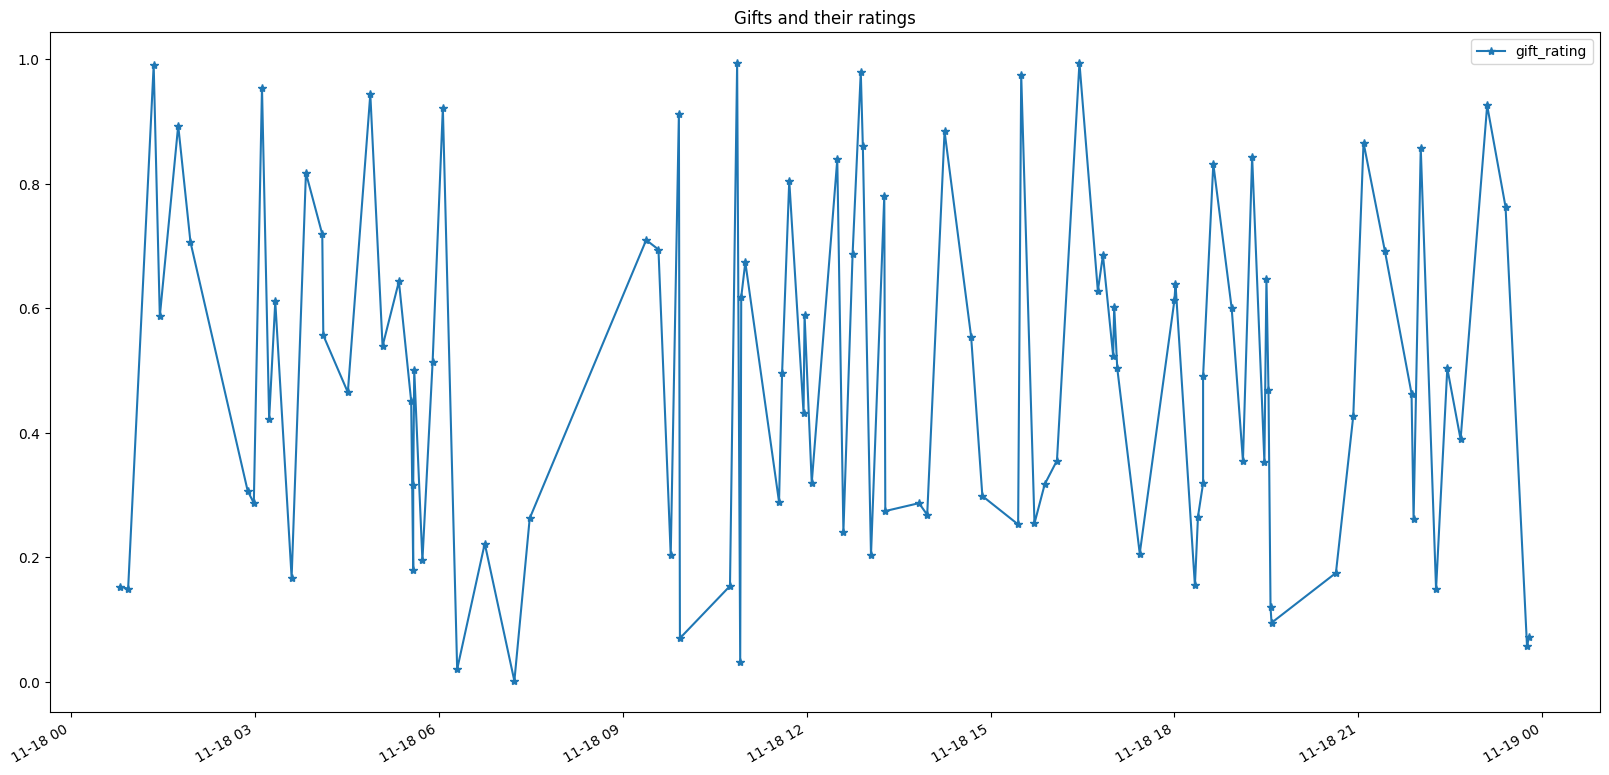

In [3]:
gift_ratings = np.random.random(100)
gift_df = pd.DataFrame({'gift_rating': gift_ratings}, index=gift_timestamp)
gift_df.sort_index(inplace=True)
print(gift_df)
gift_df.plot(title='Gifts and their ratings', figsize=(20,10), marker='*')

In [4]:
# print default agg funcs from TimeFrame class?

Now we create an EventSeries object using the birthday gift dataframe. We specify `np.mean` as the default aggregation function.

In [5]:
gift_es = tt.EventSeries(gift_df, agg_func=np.mean)

We demonstrate how to window the gift event series data with 1 hour and 5 minute windows.

In [6]:
# demo the EventSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

window_es_h = gift_es.window('1h')
window_es_h

1999-11-18 00:00:00    0.151232
1999-11-18 01:00:00    0.794165
1999-11-18 02:00:00    0.296801
1999-11-18 03:00:00    0.594264
1999-11-18 04:00:00    0.670927
1999-11-18 05:00:00    0.417314
1999-11-18 06:00:00    0.387939
1999-11-18 07:00:00    0.131879
1999-11-18 08:00:00    0.000000
1999-11-18 09:00:00    0.517892
1999-11-18 10:00:00    0.449240
1999-11-18 11:00:00    0.547283
1999-11-18 12:00:00    0.654426
1999-11-18 13:00:00    0.362546
1999-11-18 14:00:00    0.578773
1999-11-18 15:00:00    0.449791
1999-11-18 16:00:00    0.665570
1999-11-18 17:00:00    0.458780
1999-11-18 18:00:00    0.489179
1999-11-18 19:00:00    0.411657
1999-11-18 20:00:00    0.301091
1999-11-18 21:00:00    0.570187
1999-11-18 22:00:00    0.474774
1999-11-18 23:00:00    0.454409
Freq: h, dtype: float64

<Axes: title={'center': 'Average gift rating for every 1 hr window'}>

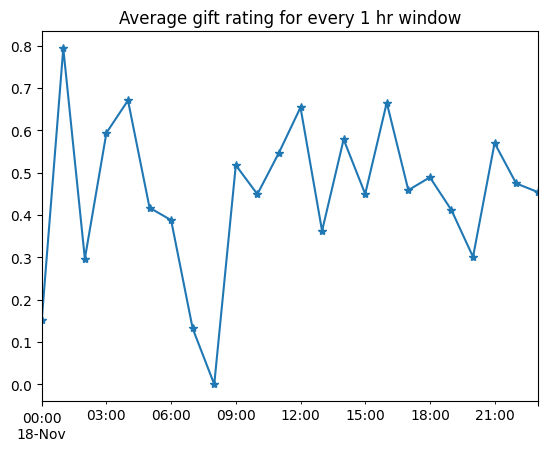

In [7]:
window_es_h.plot(title='Average gift rating for every 1 hr window', marker='*')

In [8]:
window_es_min = gift_es.window('5min')
window_es_min

1999-11-18 00:45:00    0.153002
1999-11-18 00:50:00    0.000000
1999-11-18 00:55:00    0.149462
1999-11-18 01:00:00    0.000000
1999-11-18 01:05:00    0.000000
                         ...   
1999-11-18 23:25:00    0.000000
1999-11-18 23:30:00    0.000000
1999-11-18 23:35:00    0.000000
1999-11-18 23:40:00    0.000000
1999-11-18 23:45:00    0.064727
Freq: 5min, Length: 277, dtype: float64

<Axes: title={'center': 'Average gift rating for every 5 min window'}>

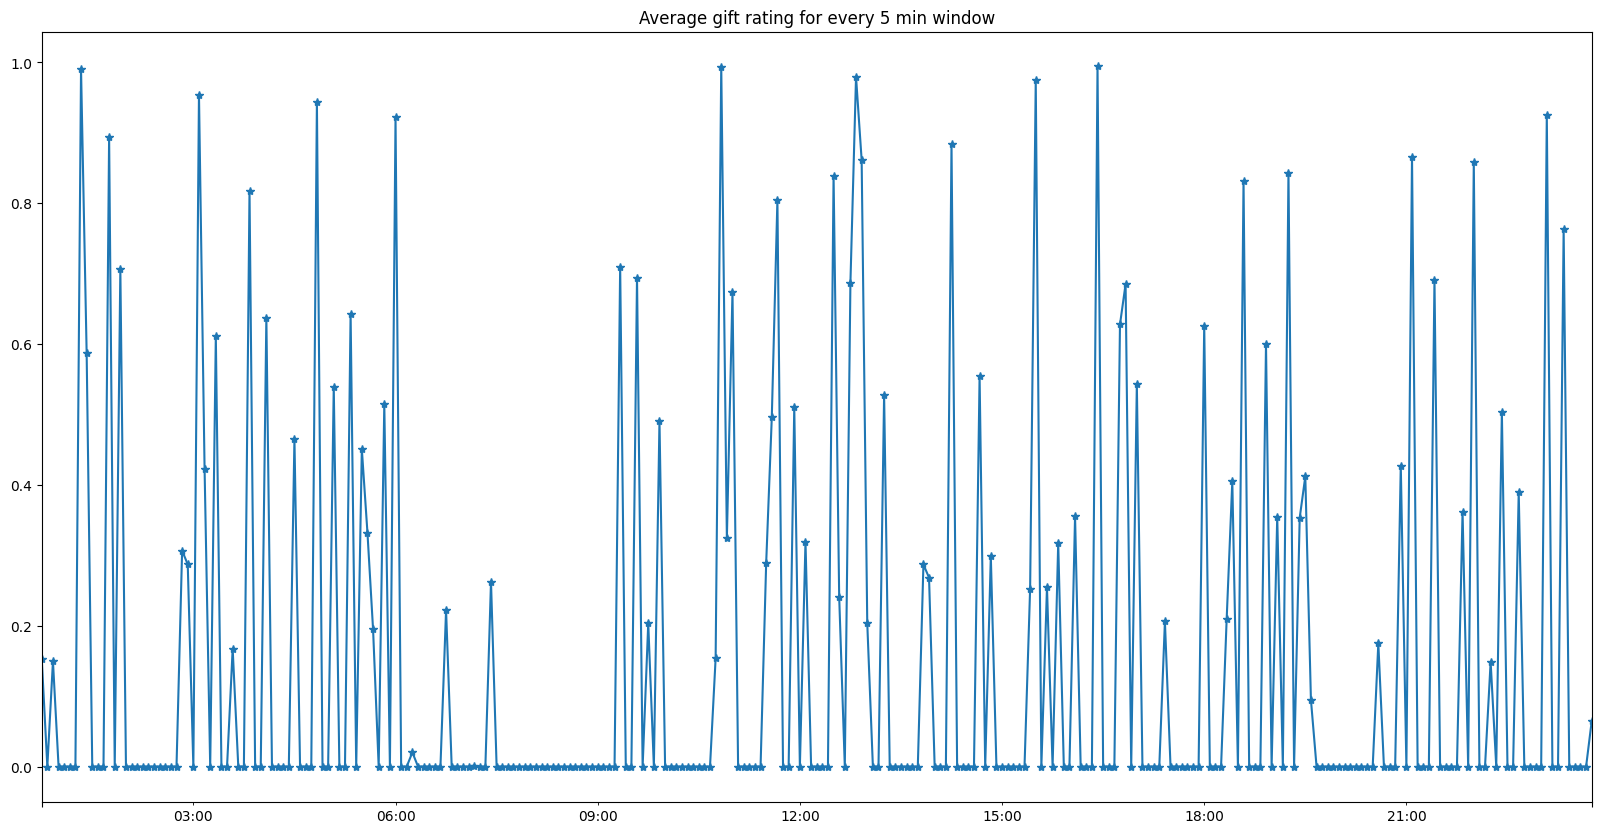

In [9]:
window_es_min.plot(title='Average gift rating for every 5 min window', marker='*', figsize=(20,10))

Now we generate the heart rate per minute dataset. First, we generate random heart rates from 60 to 130 for each minute of the day:

<Axes: title={'center': 'Heart rate per minute'}>

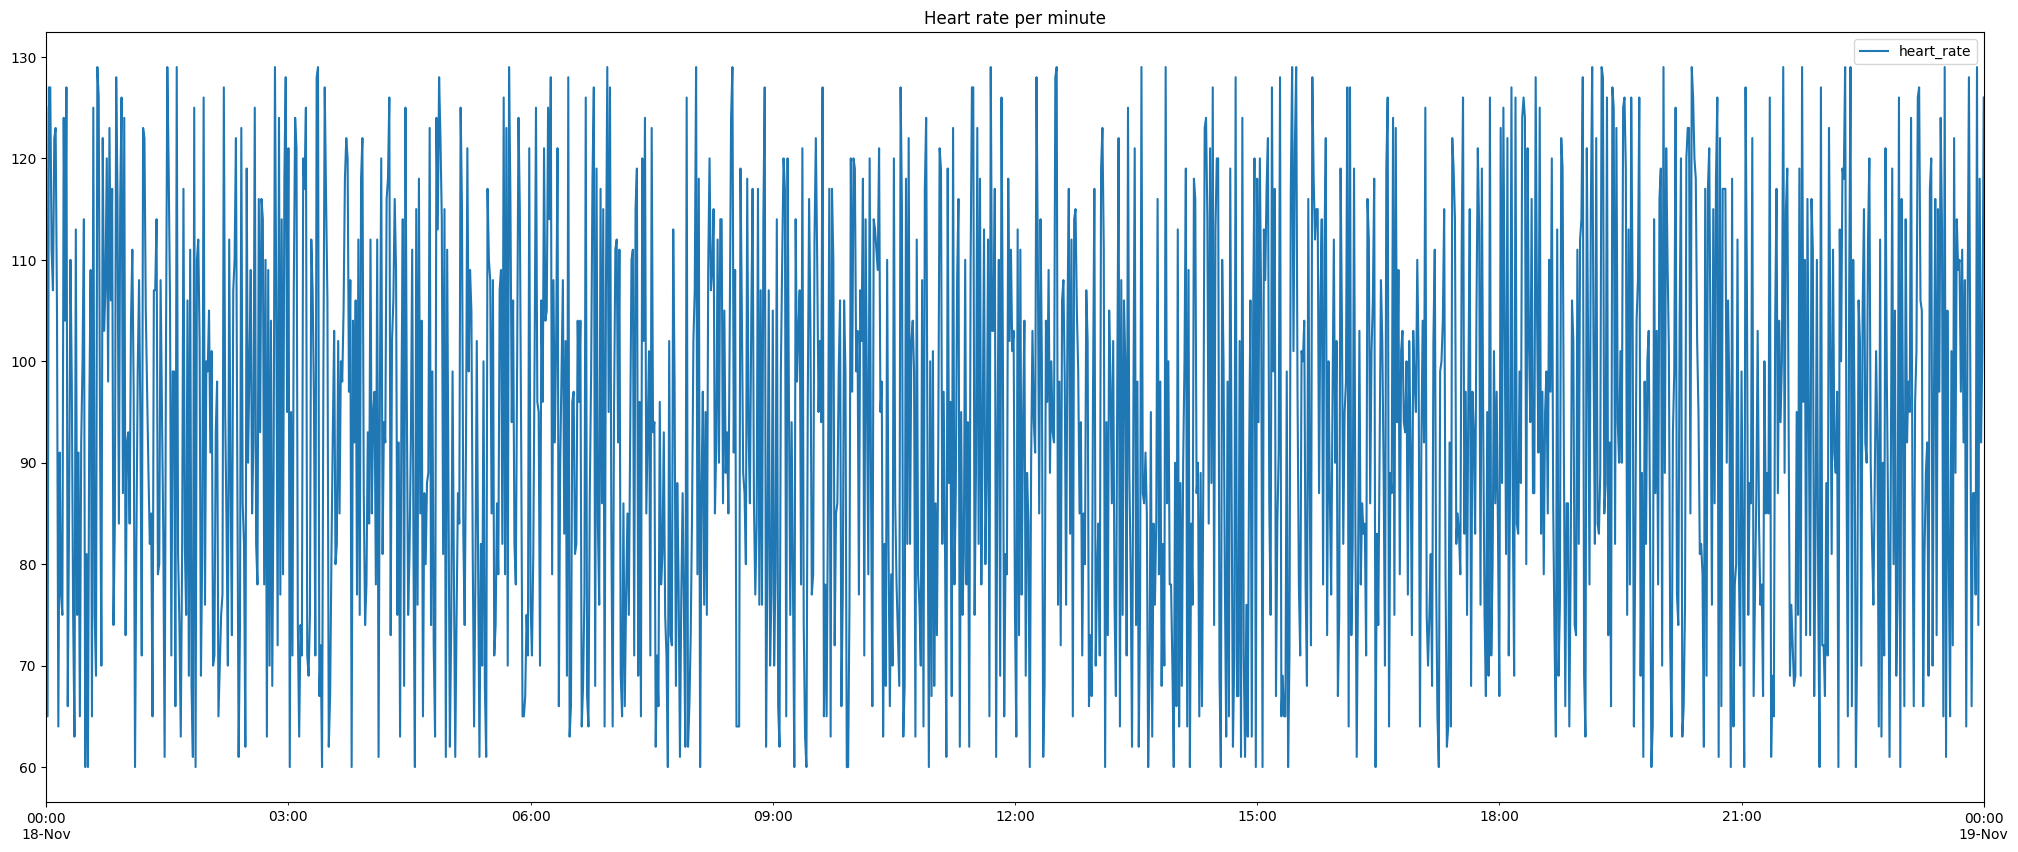

In [10]:
hr_values = np.random.randint(60, 130, size=1441)
hr_values
hr_df = pd.DataFrame({'heart_rate': hr_values}, index=timestamp)
hr_df.sort_index(inplace=True)
hr_df.plot(title='Heart rate per minute', linestyle='-', figsize=[25,10])

The code in the following cell adds to the random heart rates generated in the previous cell so that they make more sense in our context, i.e. heart rate increases when the time gets closer to a gift being given.

In [11]:
avg_hr = (np.sum(hr_values) / hr_values.size).item()

new_hr_values = []
start = 0
for time in gift_df.index:
    t_e = (60 * time.hour) + time.minute
    for t in range(start, t_e+1):
        if t == t_e:
            # add a peak heart rate value of 160 to new_hr_values
            high_hr = np.random.randint(156, 166)
            new_hr_values.append(high_hr)
            start = t + 1
            continue
        else:
            # add 1/t_i-t_e to new_hr_values
            new_hr = round(avg_hr + 60 * (1 / (t_e - t)))
            new_hr_values.append(new_hr)

if t_e+1 <= timestamp.size:
    for i in range(t_e+1, timestamp.size):
        new_hr_values.append(avg_hr)

new_hr_values

[95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 104,
 106,
 109,
 114,
 124,
 154,
 157,
 102,
 104,
 106,
 109,
 114,
 124,
 154,
 163,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 104,
 106,
 109,
 114,
 124,
 154,
 159,
 106,
 109,
 114,
 124,
 154,
 162,
 97,
 97,
 98,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 104,
 106,
 109,
 114,
 124,
 154,
 162,
 99,
 100,
 100,
 101,
 102,
 104,
 106,
 109,
 114,
 124,
 154,
 162,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 95,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 99,
 99,
 100,
 100,
 101,
 102,
 104,
 106,
 109,
 114,
 124,
 154,
 163,
 106,
 109,
 114,
 124,
 154,
 160,
 102,
 104,
 106,
 109,
 

<Axes: title={'center': 'New heart rate per minute values'}>

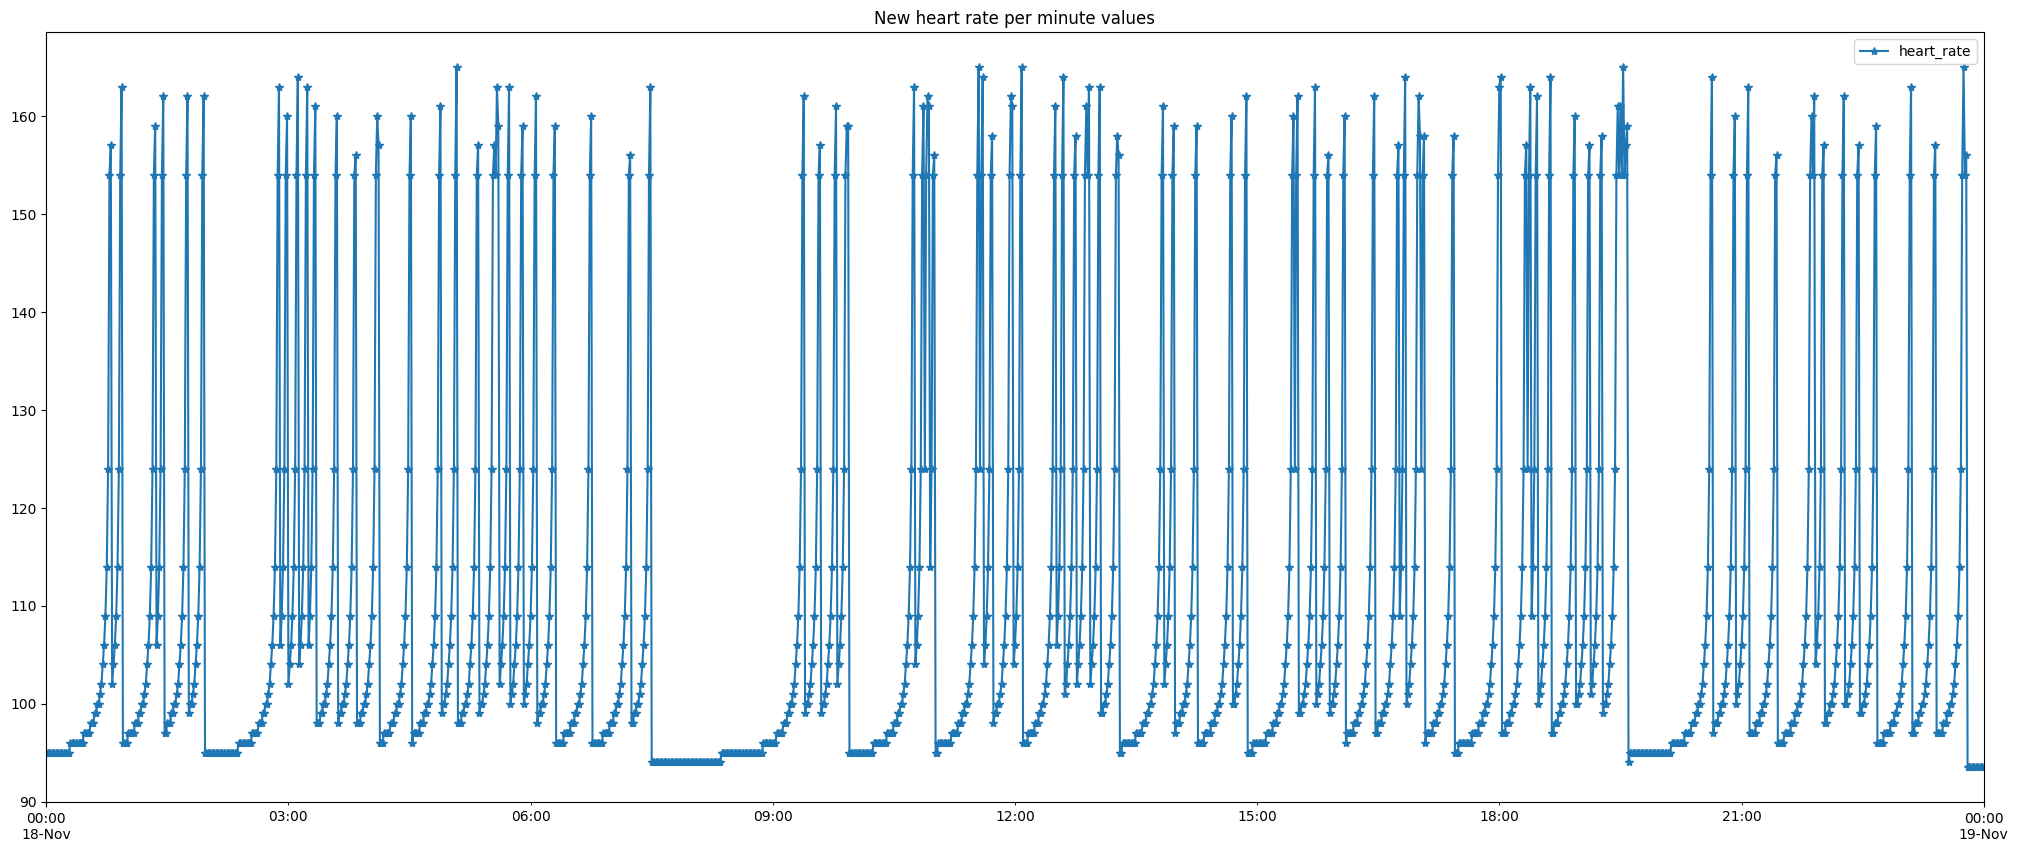

In [12]:
new_hr_df = pd.DataFrame({'heart_rate': new_hr_values}, index=timestamp)
new_hr_df.plot(title='New heart rate per minute values', marker='*', figsize=(25,10))

We create a TimeSeries object with the heart rate dataframe and also specify `np.mean` as the aggregation function:

In [13]:
hr_ts = tt.TimeSeries(new_hr_df, agg_func=np.mean)

<Axes: title={'center': 'Average heart rate (bpm) over each hour'}>

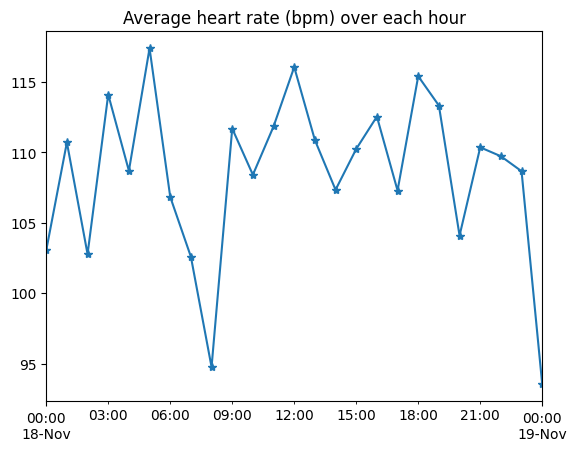

In [14]:
# demo TimeSeries window function
# see here for list of accepted freq aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

hr_ts.window('1h').plot(title='Average heart rate (bpm) over each hour', marker='*')

<Axes: title={'center': 'Average heart rate (bpm) over each 5 min'}>

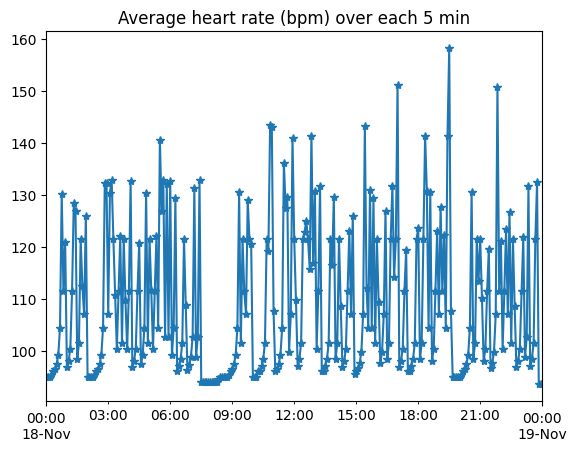

In [15]:
hr_ts.window('5min').plot(title='Average heart rate (bpm) over each 5 min', marker='*')

We then create a TimeFrame object, `tf`, and add the `hr_ts` and `gift_es` objects to it.

In [16]:
tf = tt.TimeFrame()
tf['gift_es'] = gift_es
tf['hr_ts'] = hr_ts

Then we can make a plot of the aggregated gift events and heart rates windowed according to the frequencies that we specify.

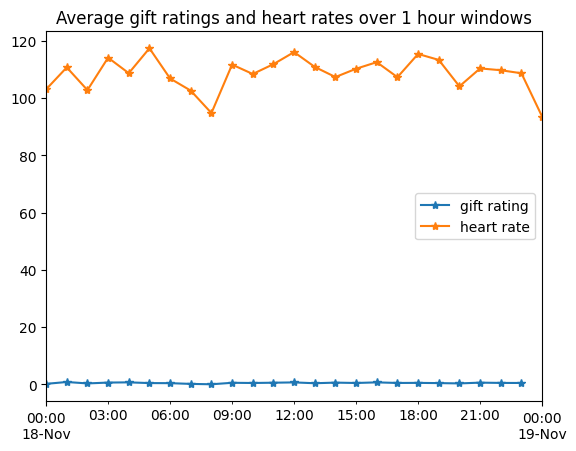

In [17]:
fig, ax = plt.subplots()
tf.window('1h').plot(ax=ax, title='Average gift ratings and heart rates over 1 hour windows', marker='*')
ax.legend(['gift rating', 'heart rate'])

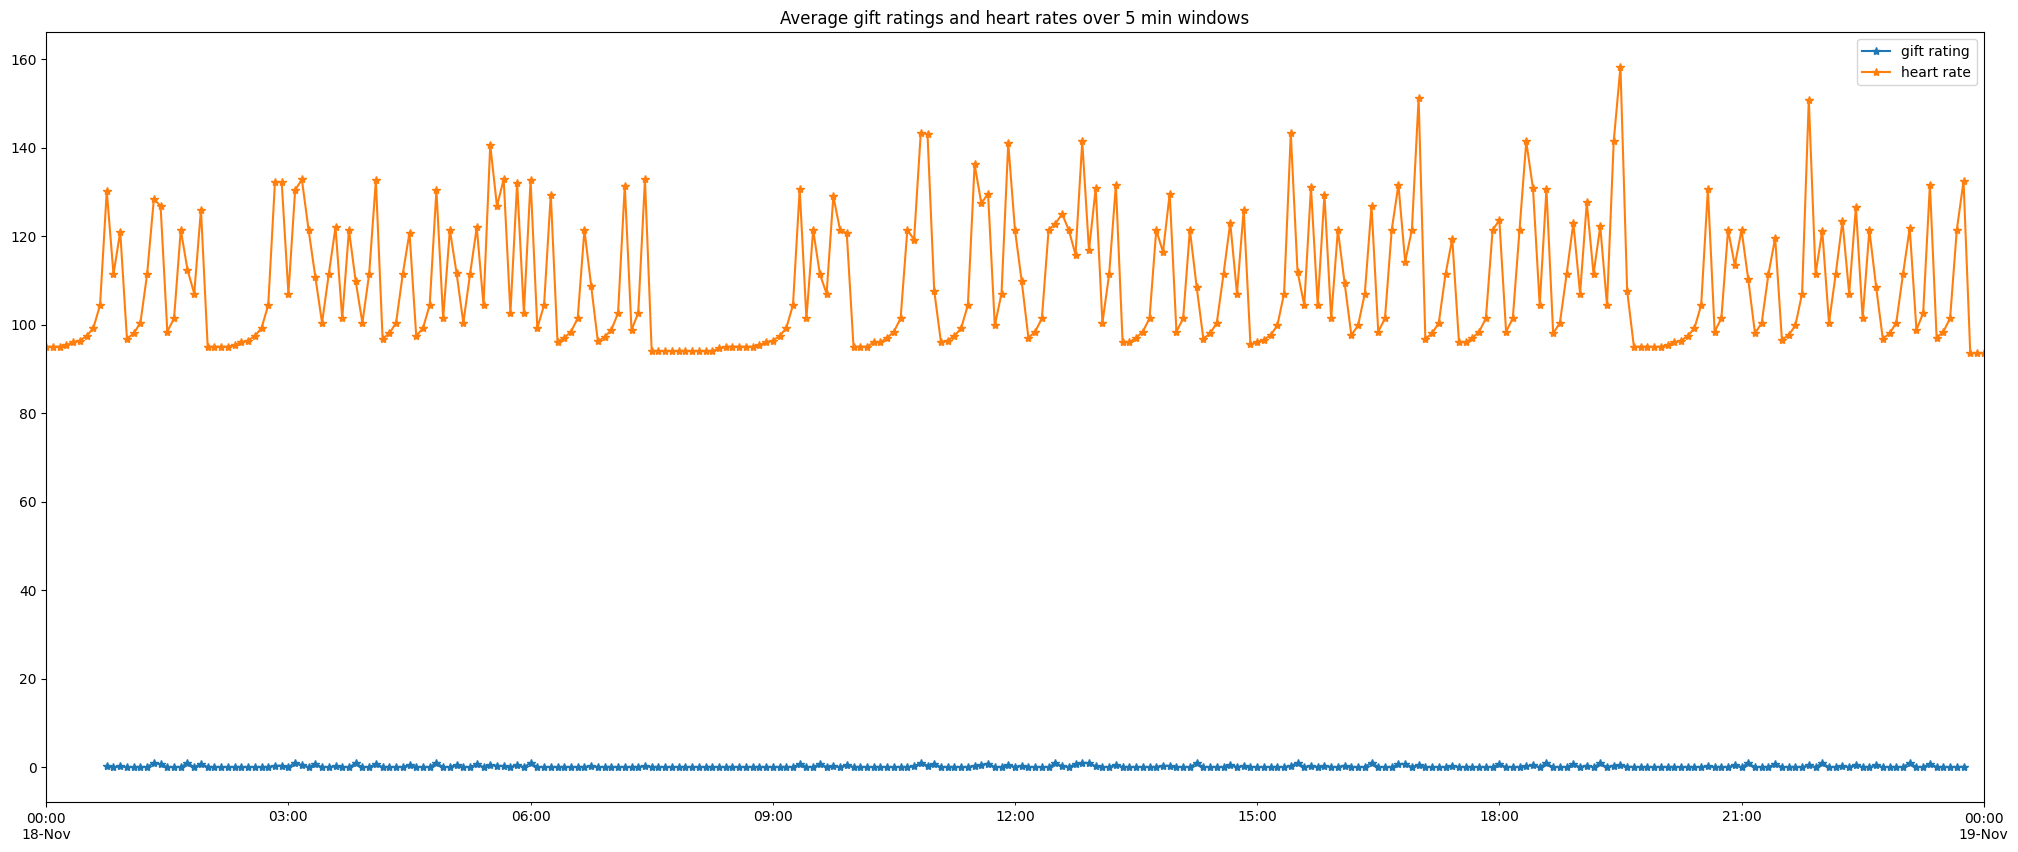

In [18]:
fig, ax = plt.subplots()
tf.window('5min').plot(figsize=(25,10), ax=ax, title='Average gift ratings and heart rates over 5 min windows', marker='*')
ax.legend(['gift rating', 'heart rate'])